<a href="https://colab.research.google.com/github/EstherOgutu/Nairobi-Hospital-Hypothyroidism-Analysis/blob/main/Nairobi_Hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPAMBASE ANALYSIS USING NAIVE BAYES CLASSIFIER



##1. Defining the Question

###a) Specifying the Data Analytic Question


This is an analysis to predict whether or not an E-mail is considered a spam or not using the Naive Bayes Classifer.

###b) Defining the Metric of Success


The metric of success for this project is to build a model using the Naive Bayes technique, which can predic whether or not an E-mail is a spam or not. The accuracy level of the prediction model should be atleast 80% to be termed as a good model.

###c) Understanding the Context


The collection of spam e-mails came from Hewlett-Packard's postmaster and individuals who had filed spam. The collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

###d) Recording the Experimental Data


For this project, I will perform the following actions:

1.Reading the data.

2.Checking the data.

3.Tidying the datasets Analysis. For the cleaning part, I will check for outliers, anomalies, missing values,checking for duplicates,dropping unnecessary columns and changing the column names into lowercase for uniformity and stripping off whitespaces and dashes.

4.I will the perform EDA (Univariate and Bivariate).

5 Performing Predictive Anaysis using:

      -Naive Bayes classifier.
6.I will apply one optimization technique to optimize my model for better performance.

7.Challenge your solution by providing insights on how you can make improvements in model improvement.



###e) Data Relevance

The data has been obtained from Hewlett-Packard. The data has attributes that are crucial to predict whether or not an E-mail should be considered a spam or not.This will help to establish a personalized spam filter.

##2. Reading Data

In [87]:
# Importing the Libraries that we will use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import metrics
from sklearn.metrics import f1_score



In [2]:
# Let's expand the no of visible columns of dataframe
pd.set_option("display.max.columns", None)

In [3]:
# Reading the data from the dataset
spam=pd.read_csv('spambase.csv', header=None)

##3. Checking the data

In [4]:
# Previewing the first five record in the spam dataset
# A function to display the first five records of a dataset
def head(df):
  print(tabulate(df.head(), headers='keys', tablefmt='psql'))
head(spam)

+----+------+------+------+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-------+------+-------+-------+-------+-------+------+------+------+
|    |    0 |    1 |    2 |   3 |    4 |    5 |    6 |    7 |    8 |    9 |   10 |   11 |   12 |   13 |   14 |   15 |   16 |   17 |   18 |   19 |   20 |   21 |   22 |   23 |   24 |   25 |   26 |   27 |   28 |   29 |   30 |   31 |   32 |   33 |   34 |   35 |   36 |   37 |   38 |   39 |   40 |   41 |   42 |   43 |   44 |   45 |   46 |   47 |   48 |    49 |   50 |    51 |    52 |    53 |    54 |   55 |   56 |   57 |
|----+------+------+------+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+

In [5]:
# Previewing the last five record in the spam dataset
# A function to display the last five records of a dataset
def tail(df):
  print(tabulate(df.tail(), headers='keys', tablefmt='psql'))
tail(spam)

+------+------+-----+------+-----+------+------+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-------+-------+------+-------+------+------+-------+------+------+------+
|      |    0 |   1 |    2 |   3 |    4 |    5 |   6 |   7 |   8 |   9 |   10 |   11 |   12 |   13 |   14 |   15 |   16 |   17 |   18 |   19 |   20 |   21 |   22 |   23 |   24 |   25 |   26 |   27 |   28 |   29 |   30 |   31 |   32 |   33 |   34 |   35 |   36 |   37 |   38 |   39 |   40 |   41 |   42 |   43 |   44 |   45 |   46 |   47 |    48 |    49 |   50 |    51 |   52 |   53 |    54 |   55 |   56 |   57 |
|------+------+-----+------+-----+------+------+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+----

In [6]:
# Checking the shape of the spam (rows and columns)
print(spam.shape)

(4601, 58)


Our spam dataset has 4601 rows and 58 columns.

In [7]:
# Understanding our datasets dataset 
print(spam.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

In [8]:
# Checking all the columns have the appropriate datatype
print(spam.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55      int64
56      int64
57      int64
dtype: object


In [9]:
# Checking the statistical information of the numerical values in our dataset
print(tabulate(spam.describe(), headers='keys', tablefmt='psql'))

+-------+-------------+-------------+-------------+--------------+-------------+--------------+-------------+-------------+--------------+-------------+-------------+-------------+--------------+--------------+--------------+-------------+-------------+-------------+------------+-------------+-------------+-------------+-------------+--------------+-------------+-------------+-------------+-------------+--------------+-------------+--------------+--------------+--------------+--------------+-------------+--------------+-------------+--------------+--------------+--------------+--------------+-------------+--------------+--------------+-------------+-------------+---------------+--------------+--------------+-------------+--------------+-------------+--------------+--------------+------------+-----------+-----------+-------------+
|       |           0 |           1 |           2 |            3 |           4 |            5 |           6 |           7 |            8 |           9 |      

##4. External Data Source Validation

The dataset has been obtained from UCI-Macine Learning Repository. The data has been obtained from Hewlett-Packard's postmaster and individuals who had filed spam. Hence, it seems to be valid and credible. 


##5. Tidying the Datasets

In [10]:
# Checking for Outliers using IQR method
# Defining a function to check for outliers

def outliers(data):
  # Calculating the first quantile
  Q1=data.quantile(0.25) 
  # Calculating the third quantile
  Q3 = data.quantile(0.75)
  # Calculating the Quartile Range
  IQR = Q3 - Q1 
  print((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
  print('-------------------------------------------------------------------------------')
  #Displaying the number of outliers in the fields where the exist
  print(IQR)
outliers(spam)

         0      1      2      3      4      5      6      7      8      9   \
0     False   True  False  False  False  False  False  False  False  False   
1      True   True  False  False  False   True   True   True  False   True   
2      True  False  False  False   True   True   True   True   True  False   
3     False  False  False  False  False  False   True   True   True   True   
4     False  False  False  False  False  False   True   True   True   True   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
4596   True  False  False  False  False   True  False  False  False  False   
4597  False  False  False  False  False  False  False  False  False  False   
4598   True  False  False  False  False  False  False  False  False  False   
4599   True  False  False  False  False  False  False  False  False  False   
4600  False  False  False  False  False  False  False  False  False  False   

         10     11     12     13     14     15     16     17   

We will not remove the outliers in this dataset because they are valid entries with records that will help in building an accurate model. 

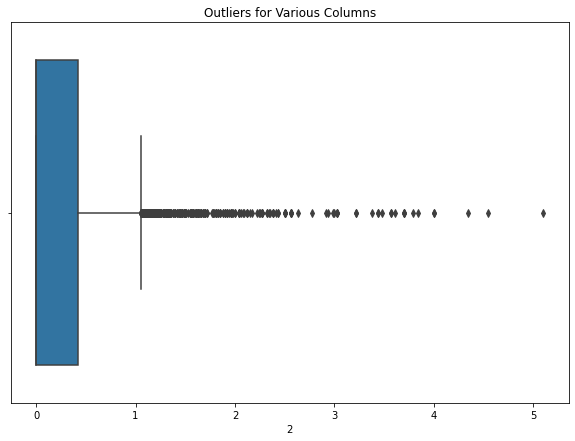

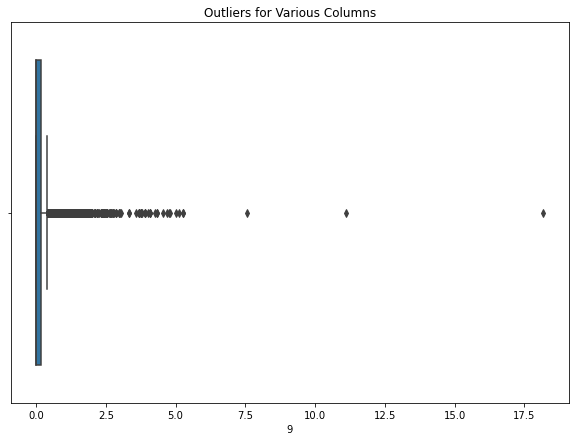

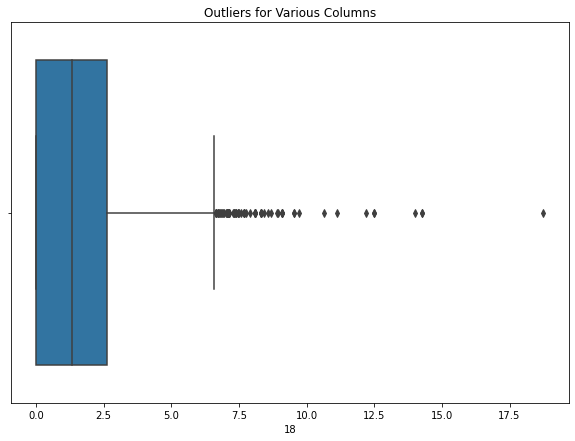

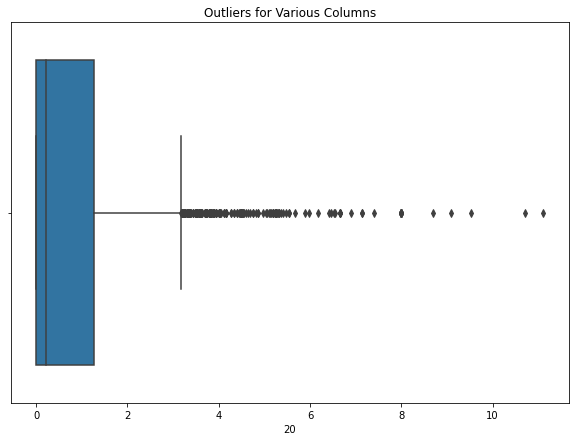

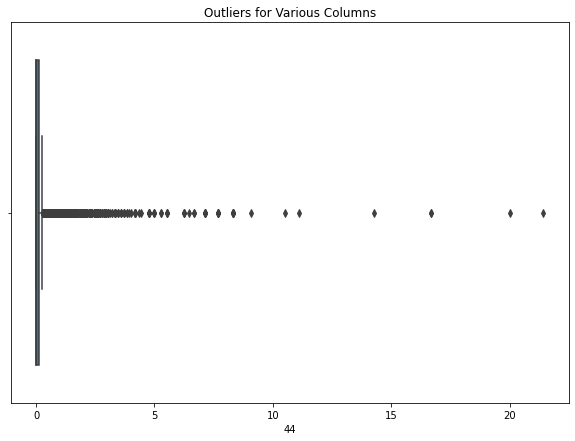

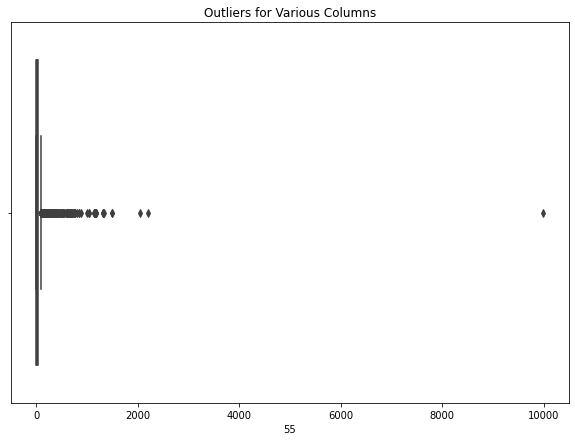

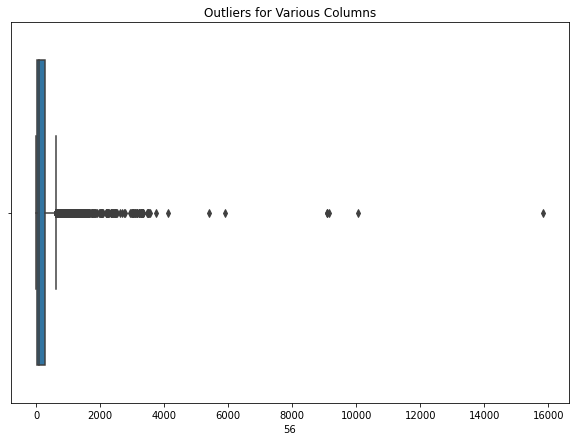

In [11]:
# Creating a function to plot outliers for each of the columns
def boxplot(data):
  fig = plt.figure(figsize =(10, 7))
  plt.title('Outliers for Various Columns')
  sns.boxplot(data)
  plt.show();
boxplot(spam[2])
boxplot(spam[9])
boxplot(spam[18])
boxplot(spam[20])
boxplot(spam[44])
boxplot(spam[55])
boxplot(spam[56])

####Checking for Anomalies

In [12]:
# Checking for Anomalies

# Defining a function to check for any duplicates in the dataset
def duplicates(data):
  print(data.duplicated().sum())
duplicates(spam)

391


In [13]:
# Displaying the duplicated rows in the dataset
duplicate = spam[spam.duplicated()]
duplicate

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
26,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.44,0.0,0.0,0.0,0.000,0.196,0.000,0.392,0.196,0.0,5.466,22,82,1
103,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.64,0.0,0.00,2.59,0.0,0.00,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
104,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
105,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.64,0.0,0.00,2.59,0.0,0.00,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
106,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.49,0.0,0.49,2.71,0.0,1.23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.0,0.0,0.0,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4441,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.49,0.0,0.49,2.71,0.0,1.23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.0,0.0,0.0,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4537,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,6,0
4541,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,8.33,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,2,0


I will not drop the dupicate entries because they are different entries, which are valid. It is only that some data in the entries are similar, though, the entries are different and not a repetition.

####Checking for Missing Values

In [14]:
# Find the total Missing Data in each column
def missingdata(data):
  print(data.isnull().sum())
missingdata(spam)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
dtype: int64


Our dataset does not contain any missing values.

In [15]:
# Exporting our clean spam datasets
#
spam.to_csv("clean_spam.csv", index=False)

In [16]:
# Lets read our dataset from our CSV file and create dataframes that we will use
#
spam_df=pd.read_csv('clean_spam.csv')

# Previewing the first five records using our tabulatetable function created earlier
head(spam_df)

+----+------+------+------+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-------+------+-------+-------+-------+-------+------+------+------+
|    |    0 |    1 |    2 |   3 |    4 |    5 |    6 |    7 |    8 |    9 |   10 |   11 |   12 |   13 |   14 |   15 |   16 |   17 |   18 |   19 |   20 |   21 |   22 |   23 |   24 |   25 |   26 |   27 |   28 |   29 |   30 |   31 |   32 |   33 |   34 |   35 |   36 |   37 |   38 |   39 |   40 |   41 |   42 |   43 |   44 |   45 |   46 |   47 |   48 |    49 |   50 |    51 |    52 |    53 |    54 |   55 |   56 |   57 |
|----+------+------+------+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+

##6. Exploratory Data Analysis for our Train Dataset

###1. Univariate Analysis

In [17]:
# Getting a description of the statistics of numerical values
print(tabulate(spam_df.describe(), headers='keys', tablefmt='psql'))

+-------+-------------+-------------+-------------+--------------+-------------+--------------+-------------+-------------+--------------+-------------+-------------+-------------+--------------+--------------+--------------+-------------+-------------+-------------+------------+-------------+-------------+-------------+-------------+--------------+-------------+-------------+-------------+-------------+--------------+-------------+--------------+--------------+--------------+--------------+-------------+--------------+-------------+--------------+--------------+--------------+--------------+-------------+--------------+--------------+-------------+-------------+---------------+--------------+--------------+-------------+--------------+-------------+--------------+--------------+------------+-----------+-----------+-------------+
|       |           0 |           1 |           2 |            3 |           4 |            5 |           6 |           7 |            8 |           9 |      

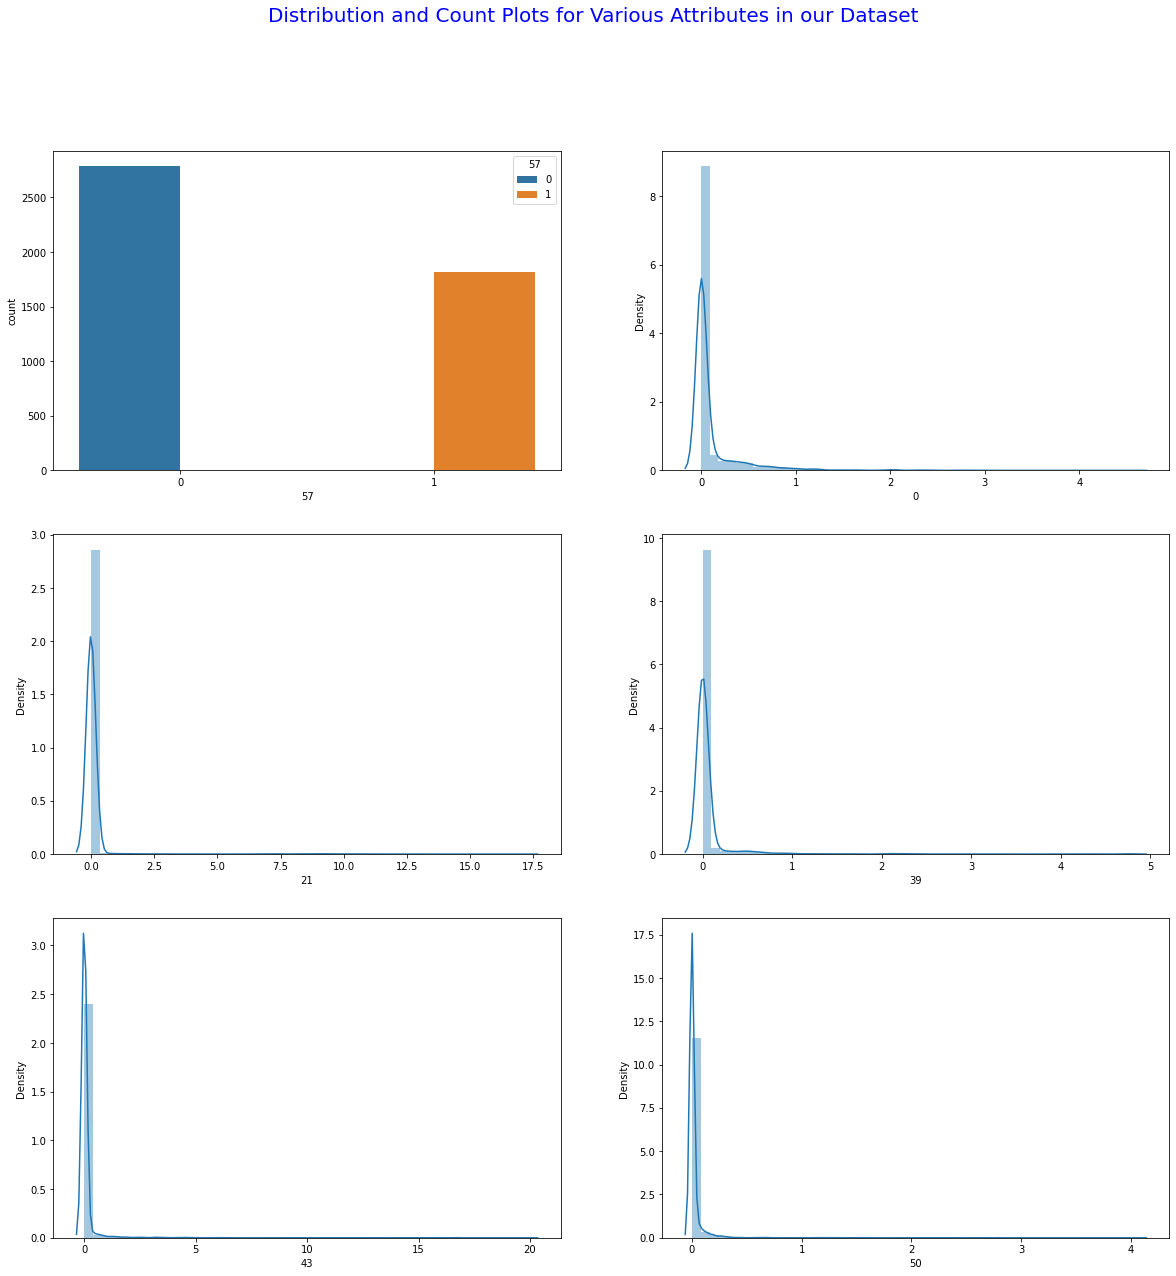

In [18]:
# Plotting Distribution Plots and Count Plots for the various attributes in our train dataset
fig,axes=plt.subplots(3,2, figsize=(20,20))
fig.suptitle('Distribution and Count Plots for Various Attributes in our Dataset', fontsize = 20, color='blue')
sns.countplot('57', data=spam_df, hue='57', ax=axes[0,0])
sns.distplot(spam_df['0'].dropna(), kde=True, ax=axes[0,1])
sns.distplot(spam_df['21'].dropna(), kde=True, ax=axes[1,0])
sns.distplot(spam_df['39'].dropna(), kde=True, ax=axes[1,1])
sns.distplot(spam_df['43'].dropna(), kde=True, ax=axes[2,0])
sns.distplot(spam_df['50'].dropna(), kde=True, ax=axes[2,1])


I choose just afew variables to do a count plot and distribution plot because the columns were too many to be plotted. But one importnant information we can gather is that most of the e-mails were not considered as spam.

###2. Bivariate Analysis

Without the column names, it will be difficult to do a Bivariate Analysis.

##7. Implementing the Solution

### Naive Bayes Classifier - Gaussian

#### Splitting 80-20

In [19]:
# Making a copy of our original dataset so that I can work on the copy and keep the original
spam_df1=spam_df.copy()

In [20]:
# Displaying the columns in our training dataset
print(spam_df1.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57'],
      dtype='object')


In [21]:
#normalizing dataframe
spam_df1= spam_df1.apply(lambda iterator: ((iterator.max() - iterator)/(iterator.max() - iterator.min())).round(2))

In [22]:
# Let's drop ther survived column in our X, along with other unnecessary columns in our prediction
# Assigning varibale to our X and y

X=spam_df1.drop(['57'], axis=1).values
y=spam_df1['57'].values

In [23]:
# Creating a Train and Test Split
#Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [24]:
# Checking the shape of our X_train,y_train and X_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(3680, 57)
(3680,)
(921, 57)


In [27]:
# Training our model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()  
model = clf.fit(X_train, y_train)  

In [28]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.7937024972855592


In [30]:
 # Measuring the accuracy of the model
print(f'The accuracy score is: {accuracy_score(y_test, predicted)} and the f1 score is {f1_score(y_test, predicted)}')
print(f'{classification_report(y_test, predicted)}')
confusion_matrix(y_test, predicted)

The accuracy score is: 0.7937024972855592 and the f1 score is 0.7991543340380549
              precision    recall  f1-score   support

         0.0       0.69      0.92      0.79       383
         1.0       0.93      0.70      0.80       538

    accuracy                           0.79       921
   macro avg       0.81      0.81      0.79       921
weighted avg       0.83      0.79      0.79       921



array([[353,  30],
       [160, 378]])

- Our accuracy score is 79.37% and the f1 score is 0.80. This means that our model is not so bad.
- According to the confusion matrix, our model was able to correctly predict 353 emails as spams and 378 emails as not spams(Total - 731). It however gave wrong predictions of 30 emails being spam and 160 not being spam (Total - 190).
- Overall, the correct predictions are more than the incorrect prediction, hence our model is decent enough. 


#### Performing the Prediction on our Test Set

In [85]:
# Making a prediction on our Test Dataset
for i in range(len(predicted)):
	print("X=%s, Predicted=%s" % (y_train[i], predicted[i]))

X=0, Predicted=0.0
X=0, Predicted=0.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=0, Predicted=0.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=0, Predicted=0.0
X=0, Predicted=0.0
X=1, Predicted=1.0
X=1, Predicted=1.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=1, Predicted=0.0
X=0, Predicted=1.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=1, Predicted=0.0
X=1, Predicted=0.0
X=1, Predicted=0.0
X=0, Predicted=1.0
X=1, Predicted=1.0
X=0, Predicted=1.0
X=1, Predicted=1.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=1, Predicted=0.0
X=0, Predicted=0.0
X=1, Predicted=1.0
X=0, Predicted=0.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=1, Predicted=0.0
X=0, Predicted=1.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=0, Predicted=1.0
X=0, Predicted=1.0
X=1, Predicted=1.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=0, Predicted=0.0
X=1, Predicted=1.0
X=1, Predicted=1.0
X=0, Predicted=0.0
X=1, Predicted=1.0
X=1, Predicted=1.0
X=1, Predicted=0.0
X=1, Predicted=0.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=0, Predicted=0.0
X=0, Predict

####Splitting 70-30

In [32]:
# Making a copy of our original dataset so that I can work on the copy and keep the original
spam_df2=spam_df.copy()

In [33]:
# Displaying the columns in our training dataset
print(spam_df2.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57'],
      dtype='object')


In [34]:
#normalizing dataframe
spam_df2= spam_df2.apply(lambda iterator: ((iterator.max() - iterator)/(iterator.max() - iterator.min())).round(2))

In [35]:
# Let's drop ther survived column in our X, along with other unnecessary columns in our prediction
# Assigning varibale to our X and y

X=spam_df2.drop(['57'], axis=1).values
y=spam_df2['57'].values

In [37]:
# Creating a Train and Test Split
#Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [38]:
# Checking the shape of our X_train,y_train and X_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(3220, 57)
(3220,)
(1381, 57)


In [39]:
# Training our model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()  
model = clf.fit(X_train, y_train)  

In [40]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8015930485155685


In [41]:
 # Measuring the accuracy of the model
print(f'The accuracy score is: {accuracy_score(y_test, predicted)} and the f1 score is {f1_score(y_test, predicted)}')
print(f'{classification_report(y_test, predicted)}')
confusion_matrix(y_test, predicted)

The accuracy score is: 0.8015930485155685 and the f1 score is 0.8102493074792244
              precision    recall  f1-score   support

         0.0       0.69      0.93      0.79       559
         1.0       0.94      0.71      0.81       822

    accuracy                           0.80      1381
   macro avg       0.81      0.82      0.80      1381
weighted avg       0.84      0.80      0.80      1381



array([[522,  37],
       [237, 585]])

- Our accuracy score is 80.16% and the f1 score is 0.81. This means that our model performs better that the (80-20) split.
- According to the confusion matrix, our model was able to correctly predict 522 emails as spams and 585 emails as not spams(Total - 1107). It however gave wrong predictions of 37 emails being spam and 237 not being spam (Total - 274).
- Overall, the correct predictions are more than the incorrect prediction, hence our model is decent enough.
- It also has better performance than the (80-20)split. 


#### Performing the Prediction on our Test Set

In [86]:
# Making a prediction on our Test Dataset
for i in range(len(predicted)):
	print("X=%s, Predicted=%s" % (y_train[i], predicted[i]))

X=0, Predicted=0.0
X=0, Predicted=0.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=0, Predicted=0.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=0, Predicted=0.0
X=0, Predicted=0.0
X=1, Predicted=1.0
X=1, Predicted=1.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=1, Predicted=0.0
X=0, Predicted=1.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=1, Predicted=0.0
X=1, Predicted=0.0
X=1, Predicted=0.0
X=0, Predicted=1.0
X=1, Predicted=1.0
X=0, Predicted=1.0
X=1, Predicted=1.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=1, Predicted=0.0
X=0, Predicted=0.0
X=1, Predicted=1.0
X=0, Predicted=0.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=1, Predicted=0.0
X=0, Predicted=1.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=0, Predicted=1.0
X=0, Predicted=1.0
X=1, Predicted=1.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=0, Predicted=0.0
X=1, Predicted=1.0
X=1, Predicted=1.0
X=0, Predicted=0.0
X=1, Predicted=1.0
X=1, Predicted=1.0
X=1, Predicted=0.0
X=1, Predicted=0.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=0, Predicted=0.0
X=0, Predict

####Splitting 60-40

In [44]:
# Making a copy of our original dataset so that I can work on the copy and keep the original
spam_df3=spam_df.copy()

In [45]:
# Displaying the columns in our training dataset
print(spam_df3.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57'],
      dtype='object')


In [46]:
#normalizing dataframe
spam_df3= spam_df3.apply(lambda iterator: ((iterator.max() - iterator)/(iterator.max() - iterator.min())).round(2))

In [47]:
# Let's drop ther survived column in our X, along with other unnecessary columns in our prediction
# Assigning varibale to our X and y

X=spam_df3.drop(['57'], axis=1).values
y=spam_df3['57'].values

In [48]:
# Creating a Train and Test Split
#Train using 60% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=0)

In [49]:
# Checking the shape of our X_train,y_train and X_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(2760, 57)
(2760,)
(1841, 57)


In [50]:
# Training our model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()  
model = clf.fit(X_train, y_train)  

In [51]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8131450298750679


In [52]:
 # Measuring the accuracy of the model
print(f'The accuracy score is: {accuracy_score(y_test, predicted)} and the f1 score is {f1_score(y_test, predicted)}')
print(f'{classification_report(y_test, predicted)}')
confusion_matrix(y_test, predicted)

The accuracy score is: 0.8131450298750679 and the f1 score is 0.8228630278063852
              precision    recall  f1-score   support

         0.0       0.70      0.94      0.80       744
         1.0       0.95      0.73      0.82      1097

    accuracy                           0.81      1841
   macro avg       0.82      0.83      0.81      1841
weighted avg       0.85      0.81      0.81      1841



array([[698,  46],
       [298, 799]])

- Our accuracy score is 81.31% and the f1 score is 0.82. This means that our model is better performing compared to the other two (80-20 and 70-30) splits.
- According to the confusion matrix, our model was able to correctly predict 698 emails as spams and 799 emails as not spams(Total - 1497). It however gave wrong predictions of 46 emails being spam and 298 not being spam (Total - 344).
- Overall, the correct predictions are more than the incorrect prediction, hence our model is decent enough.
- It is also the model that gives the highest accuracy and f1 scores, compared to the other splits. 


#### Performing the Prediction on our Test Set

In [53]:
# Making a prediction on our Test Dataset
predicted = clf.predict(X_test)
predicted

array([0., 0., 1., ..., 1., 0., 1.])

After performing the three splits(80-20, 70-30, and 60-40), they all yielded decend results. Below are their accuracy and f1 scores:
- 80-20 Split: Accuracy Score - 79.37% and f1 score - 0.80
- 70-30 Split: Accuracy Score - 80.16%% and f1 score - 0.81
- 60-40 Split: Accuracy Score - 81.31% and f1 score - 0.82

I will therefore recommend the 60-40 split for this dataset.

#### Optimizing the Best Performing (60-40 Split) Model By Drppoing the Highliy Correlated Features

In [59]:
# Create correlation matrix
corr_matrix = spam_df3.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [60]:
# Drop features 
spam_df3=spam_df3.drop(spam_df3[to_drop], axis=1)

In [61]:
# Displaying the columns in our training dataset
print(spam_df3.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57'],
      dtype='object')


In [62]:
#normalizing dataframe
spam_df3= spam_df3.apply(lambda iterator: ((iterator.max() - iterator)/(iterator.max() - iterator.min())).round(2))

In [63]:
# Let's drop ther survived column in our X, along with other unnecessary columns in our prediction
# Assigning varibale to our X and y

X=spam_df3.drop(['57'], axis=1).values
y=spam_df3['57'].values

In [64]:
# Creating a Train and Test Split
#Train using 60% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=0)

In [65]:
# Checking the shape of our X_train,y_train and X_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(2760, 56)
(2760,)
(1841, 56)


In [66]:
# Training our model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()  
model = clf.fit(X_train, y_train)  

In [67]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8180336773492667


In [68]:
 # Measuring the accuracy of the model
print(f'The accuracy score is: {accuracy_score(y_test, predicted)} and the f1 score is {f1_score(y_test, predicted)}')
print(f'{classification_report(y_test, predicted)}')
confusion_matrix(y_test, predicted)

The accuracy score is: 0.8180336773492667 and the f1 score is 0.8281169830682402
              precision    recall  f1-score   support

         0.0       0.71      0.94      0.81       744
         1.0       0.95      0.74      0.83      1097

    accuracy                           0.82      1841
   macro avg       0.83      0.84      0.82      1841
weighted avg       0.85      0.82      0.82      1841



array([[699,  45],
       [290, 807]])

- Our accuracy score is 81.80% and the f1 score is 0.83. This means that our model is better performing compared to our best performing model. There has been a slight improvement in the accuracy and f1 score.
- According to the confusion matrix, our model was able to correctly predict 699 emails as spams and 807 emails as not spams(Total - 1506). It however gave wrong predictions of 45 emails being spam and 290 not being spam (Total - 335).
- Overall, the correct predictions are more than the incorrect prediction, hence our model is decent enough.
- It is also the model that gives the highest accuracy and f1 scores, compared to the other models. 

####Performing Prediction on our Test Set

In [84]:
# Predicting our test dataset
for i in range(len(predicted)):
	print("X=%s, Predicted=%s" % (y_train[i], predicted[i]))

X=0, Predicted=0.0
X=0, Predicted=0.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=0, Predicted=0.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=0, Predicted=0.0
X=0, Predicted=0.0
X=1, Predicted=1.0
X=1, Predicted=1.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=1, Predicted=0.0
X=0, Predicted=1.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=1, Predicted=0.0
X=1, Predicted=0.0
X=1, Predicted=0.0
X=0, Predicted=1.0
X=1, Predicted=1.0
X=0, Predicted=1.0
X=1, Predicted=1.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=1, Predicted=0.0
X=0, Predicted=0.0
X=1, Predicted=1.0
X=0, Predicted=0.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=1, Predicted=0.0
X=0, Predicted=1.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=0, Predicted=1.0
X=0, Predicted=1.0
X=1, Predicted=1.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=0, Predicted=0.0
X=1, Predicted=1.0
X=1, Predicted=1.0
X=0, Predicted=0.0
X=1, Predicted=1.0
X=1, Predicted=1.0
X=1, Predicted=0.0
X=1, Predicted=0.0
X=0, Predicted=1.0
X=0, Predicted=0.0
X=0, Predicted=0.0
X=0, Predict

##8. Challenging the Solution

#### Performing LDA and using Random Forest Classifier

In [69]:
# Making a copy of our original dataset so that I can work on the copy and keep the original
spam_df5=spam_df.copy()

In [70]:
# Checking the columns of the dataset
spam_df5.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57'],
      dtype='object')

In [75]:
n_neighbors = 5
random_state = 0

# Splitting the data into dependent and independent variables
X = spam_df5.drop('57', axis=1)
y = spam_df5.iloc[:, 57].values

# Creating a Train and Test Split
#Train using 60% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=0)

# Performing Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Perfoming LDA to reduce the dimentionality of our dataset
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [76]:
# Training and Making Predictions
# We will use the Random Forest classifier to evaluate the performance of a LDA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [77]:
 # Measuring the accuracy of the model
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9049429657794676 and the f1 score is 0.8821548821548822
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1097
           1       0.88      0.88      0.88       744

    accuracy                           0.90      1841
   macro avg       0.90      0.90      0.90      1841
weighted avg       0.90      0.90      0.90      1841



array([[1011,   86],
       [  89,  655]])

- The accuracy score of Random Forest Classifier is 90.49% and the f1 score is 0.88. Which is by far the best result compared to the other models.
- According to the confusion matrix, our model was able to correctly predict 1011 emails as spams and 655 emails as not spams(Total - 1666). It however gave wrong predictions of 86 emails being spam and 89 not being spam (Total - 175).
- Overall, the correct predictions are more than the incorrect prediction, hence our model is decent enough.
- It is also the model that gives the highest accuracy and f1 scores, compared to the other models. 

#### Performing Prediction on our Test Set

In [83]:
# Predicting our test dataset
for i in range(len(y_pred)):
	print("X=%s, Predicted=%s" % (y_train[i], y_pred[i]))

X=0, Predicted=1
X=0, Predicted=0
X=0, Predicted=0
X=0, Predicted=1
X=0, Predicted=1
X=0, Predicted=0
X=0, Predicted=0
X=0, Predicted=0
X=0, Predicted=1
X=1, Predicted=0
X=1, Predicted=1
X=0, Predicted=0
X=0, Predicted=1
X=1, Predicted=1
X=0, Predicted=0
X=0, Predicted=0
X=0, Predicted=1
X=1, Predicted=1
X=1, Predicted=1
X=1, Predicted=0
X=0, Predicted=0
X=1, Predicted=0
X=0, Predicted=0
X=1, Predicted=0
X=0, Predicted=0
X=0, Predicted=1
X=1, Predicted=0
X=0, Predicted=0
X=1, Predicted=0
X=0, Predicted=0
X=0, Predicted=0
X=0, Predicted=1
X=1, Predicted=1
X=0, Predicted=0
X=0, Predicted=0
X=0, Predicted=1
X=0, Predicted=0
X=0, Predicted=0
X=1, Predicted=0
X=0, Predicted=0
X=0, Predicted=1
X=0, Predicted=1
X=1, Predicted=0
X=1, Predicted=0
X=0, Predicted=1
X=1, Predicted=1
X=1, Predicted=0
X=1, Predicted=1
X=1, Predicted=1
X=0, Predicted=0
X=0, Predicted=0
X=0, Predicted=0
X=0, Predicted=1
X=0, Predicted=0
X=0, Predicted=1
X=0, Predicted=0
X=0, Predicted=1
X=0, Predicted=0
X=0, Predicted

## Conclusion

- After challenging my solution, I found that Random Forest Classifier performs better than the best model of Naive Bayes (60-40) split. Random Forest provides 90.49% accuracy, while Naive bayes (60-40) split provides 81.80%.
- This, therefore make Random Forest Classifier the best option for this dataset.